<a href="https://colab.research.google.com/github/rll/deepul/blob/master/homeworks/hw1/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

## General Tips
In each homework problem, you will implement autoregressive models and run it on various datasets. Oftentime you will run it on two datasets (dataset 1 and dataset 2). In these cases, the expected outputs for dataset 1 are already provided to help as a sanity check.

Feel free to print whatever output (e.g. debugging code, training code, etc) you want, as the graded submission will be the submitted pdf with images.

There is a lot of freedom in this homework to design write and design your own models. Hyperparameters are given as a guide to show what worked for us, but feel free to explore and use what you find is best!

Run the cells below to load up the starter code.

In [1]:
!curl "https://drive.usercontent.google.com/download?id=1EG4Cwn4GS2amd8IS1cp7AHIMYydOwqgy&confirm=xxx" -o data/hw1_data.zip
!unzip -o -qq data/hw1_data.zip -d data/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100 50.1M  100 50.1M    0     0  66.9M      0 --:--:-- --:--:-- --:--:-- 66.9M


In [2]:
!pip install ..

Processing /home/ubuntu/Documents/CS294-158
  Preparing metadata (setup.py) ... done
  Created wheel for deepul: filename=deepul-0.1.0-py3-none-any.whl size=42338 sha256=b0dbbcadfa3c224efaab9cb3345a59e0cdd31b3c237aca078a65b1e441475a36
  Stored in directory: /home/ubuntu/.cache/pip/wheels/c4/35/f7/51059a038a194a56ffe68cd93d07d72614887c5129182f6f52
Successfully built deepul
  Attempting uninstall: deepul
    Found existing installation: deepul 0.1.0
    Uninstalling deepul-0.1.0:
      Successfully uninstalled deepul-0.1.0


In [3]:
import numpy as np

import torch
from torch.utils.data import DataLoader

from deepul.hw1_helper import (
    train,
    # Q1
    visualize_q1_data,
    q1_save_results,
    # Q2
    visualize_q2a_data,
    visualize_q2b_data,
    q2ab_save_results,
    # Q3
    q3ab_save_results,
    q3c_save_results,
    # Q4
    q4a_save_results,
    q4b_save_results,
    # Q5
    visualize_q5_data,
    q5a_save_results,
    # Q6
    visualize_q6_data,
    q6a_save_results,
)

/opt/conda/envs/CS294-158/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from deepul.models.histogram import Histogram
from deepul.models.mixture import LogisticsMixture
from deepul.models.pixelcnn import PixelCNN
from deepul.models.transformer import GPT, ImageGPT, MultimodalGPT

from deepul.data.utils import IntDataset, SeqDatasetWeight, MultimodalDataset, batch_tensor_apply

# Question 1: 1D Data

In this question, we will train simple generative models on discrete 1D data.

Execute the cell below to visualize our datasets

Dataset 1


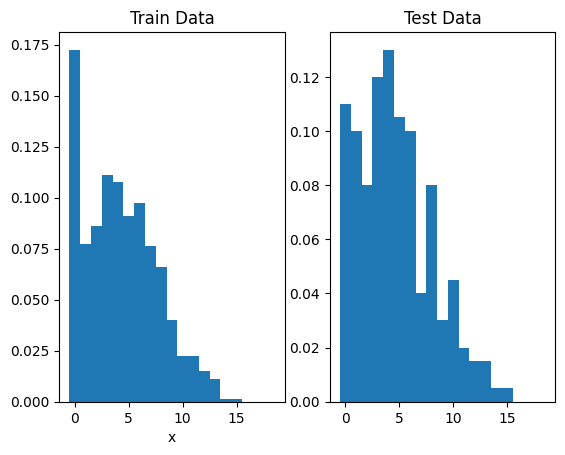

Dataset 2


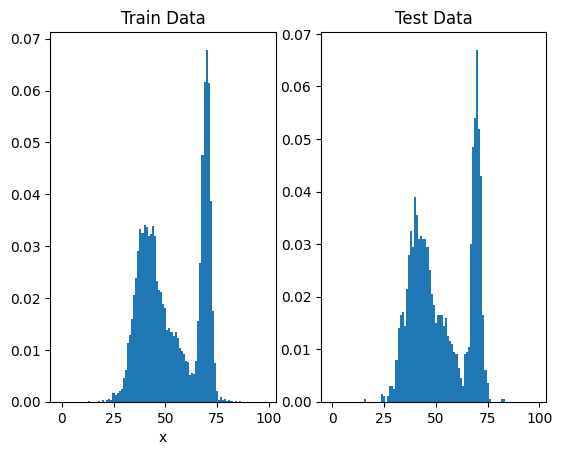

In [ ]:
visualize_q1_data(dset_type=1)
visualize_q1_data(dset_type=2)

## Part (a) Fitting a Histogram

Let $\theta = (\theta_0, \dots, \theta_{d-1}) \in \mathbb{R}^{d}$ and define the model $p_\theta(x) = \frac{e^{\theta_x}}{\sum_{x'}e^{\theta_{x'}}}$

Fit $p_\theta$ with maximum likelihood via stochastic gradient descent on the training set, using $\theta$ initialized to zero. Use your favorite version of stochastic gradient descent, and optimize your hyperparameters on a validation set of your choice.

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. Plot the model probabilities in a bar graph with $\{0,\dots,d-1\}$ on the x-axis and a real number in $[0,1]$ on the y-axis.




Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
def q1_a(train_data, test_data, dset_id, d,
         batch_size=128, epochs=20, lr=1e-1, device=None):
    """
    train_data: An (n_train,) numpy array of integers in {0, ..., d-1}
    test_data: An (n_test,) numpy array of integers in {0, .., d-1}
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
            used to set different hyperparameters for different datasets
    d: The number of possible discrete values for random variable x

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (d,) of model probabilities
    """
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"

    model = Histogram(d).to(device)
    train_loader = DataLoader(IntDataset(train_data), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(IntDataset(test_data), batch_size=batch_size)
    train_losses, test_losses = train(model, train_loader, test_loader, lr=lr, epochs=epochs)
    distribution = model.get_probs()

    return train_losses, test_losses, distribution

### Results

Once you've implemented `q1_a`, execute the cells below to visualize and save your results



Train Epoch: 1 	Test Loss: 5.663139820098877
Train Epoch: 2 	Test Loss: 5.591755151748657
Train Epoch: 3 	Test Loss: 5.591965913772583
Train Epoch: 4 	Test Loss: 5.602538585662842
Train Epoch: 5 	Test Loss: 5.594515800476074
Train Epoch: 6 	Test Loss: 5.578630208969116
Train Epoch: 7 	Test Loss: 5.558982849121094
Train Epoch: 8 	Test Loss: 5.559171915054321
Train Epoch: 9 	Test Loss: 5.561266660690308
Train Epoch: 10 	Test Loss: 5.567845106124878
Train Epoch: 11 	Test Loss: 5.558582782745361
Train Epoch: 12 	Test Loss: 5.565188646316528
Train Epoch: 13 	Test Loss: 5.562617301940918
Train Epoch: 14 	Test Loss: 5.5563390254974365
Train Epoch: 15 	Test Loss: 5.56553053855896
Train Epoch: 16 	Test Loss: 5.563869953155518
Train Epoch: 17 	Test Loss: 5.562028646469116
Train Epoch: 18 	Test Loss: 5.547167778015137
Train Epoch: 19 	Test Loss: 5.550940990447998
Train Epoch: 20 	Test Loss: 5.554766416549683
Final Test Loss: 5.5548


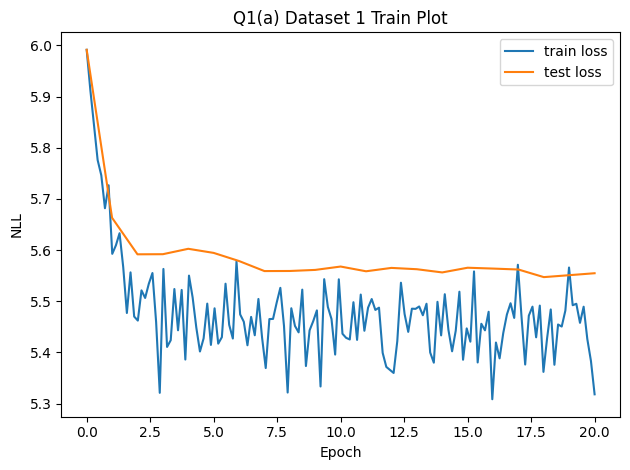

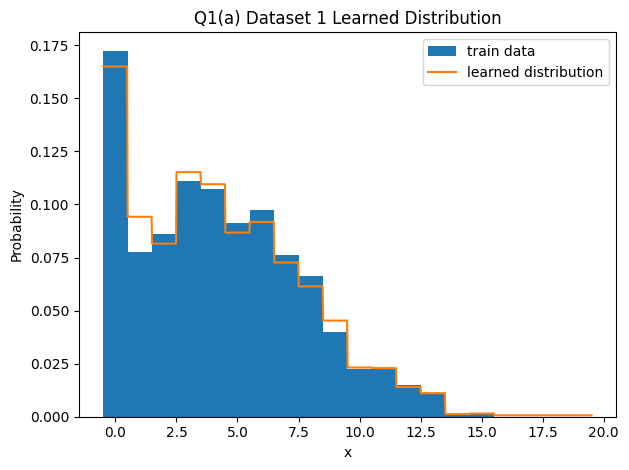

In [ ]:
q1_save_results(1, 'a', q1_a)

Train Epoch: 1 	Test Loss: 8.286662817001343
Train Epoch: 2 	Test Loss: 8.278493225574493
Train Epoch: 3 	Test Loss: 8.277093708515167
Train Epoch: 4 	Test Loss: 8.270880937576294
Train Epoch: 5 	Test Loss: 8.273706555366516
Train Epoch: 6 	Test Loss: 8.28261911869049
Train Epoch: 7 	Test Loss: 8.278515338897705
Train Epoch: 8 	Test Loss: 8.273858487606049
Train Epoch: 9 	Test Loss: 8.277527868747711
Train Epoch: 10 	Test Loss: 8.27699464559555
Train Epoch: 11 	Test Loss: 8.280482828617096
Train Epoch: 12 	Test Loss: 8.27409952878952
Train Epoch: 13 	Test Loss: 8.271201848983765
Train Epoch: 14 	Test Loss: 8.281650602817535
Train Epoch: 15 	Test Loss: 8.274921178817749
Train Epoch: 16 	Test Loss: 8.273234248161316
Train Epoch: 17 	Test Loss: 8.2809499502182
Train Epoch: 18 	Test Loss: 8.270575404167175
Train Epoch: 19 	Test Loss: 8.277929484844208
Train Epoch: 20 	Test Loss: 8.278552293777466
Final Test Loss: 8.2786


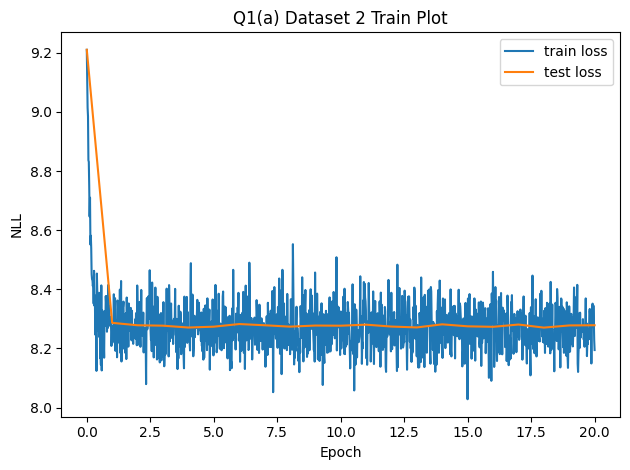

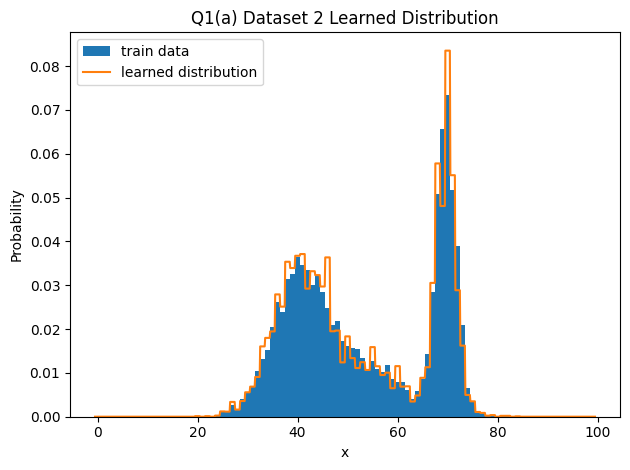

In [ ]:
q1_save_results(2, 'a', q1_a)

## Part (b) Fitting Discretized Mixture of Logistics

Let us model $p_\theta(x)$ as a **discretized** mixture of 4 logistics such that $p_\theta(x) = \sum_{i=1}^4 \pi_i[\sigma((x+0.5 - \mu_i)/s_i) - \sigma((x-0.5-\mu_i)/s_i)]$

For the edge case of when $x = 0$, we replace $x-0.5$ by $-\infty$, and for $x = 99$, we replace $x+0.5$ by $\infty$.

You may find the [PixelCNN++](https://arxiv.org/abs/1701.05517) helpful for more information on discretized mixture of logistics.

**Provide the same set of corresponding deliverables as part (a)**

Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
def q1_b(train_data, test_data, dset_id, d, m=4,
         batch_size=128, epochs=10, lr=1e-1, device=None):
    """
    train_data: An (n_train,) numpy array of integers in {0, ..., d-1}
    test_data: An (n_test,) numpy array of integers in {0, .., d-1}
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
                used to set different hyperparameters for different datasets
    d: The number of possible discrete values for random variable x

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (d,) of model probabilities
    """
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"

    model = LogisticsMixture(m, d).to(device)
    train_loader = DataLoader(IntDataset(train_data), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(IntDataset(test_data), batch_size=batch_size)
    train_losses, test_losses = train(model, train_loader, test_loader, lr=lr, epochs=epochs)
    distribution = model.get_probs()

    return train_losses, test_losses, distribution

### Results

Once you've implemented `q1_b`, execute the cells below to visualize and save your results



Train Epoch: 1 	Test Loss: 3.1492300033569336
Train Epoch: 2 	Test Loss: 2.7741854190826416
Train Epoch: 3 	Test Loss: 2.652316927909851
Train Epoch: 4 	Test Loss: 2.572696328163147
Train Epoch: 5 	Test Loss: 2.554023504257202
Train Epoch: 6 	Test Loss: 2.555172085762024
Train Epoch: 7 	Test Loss: 2.558680772781372
Train Epoch: 8 	Test Loss: 2.558757781982422
Train Epoch: 9 	Test Loss: 2.56203830242157
Train Epoch: 10 	Test Loss: 2.5638433694839478
Final Test Loss: 2.5638


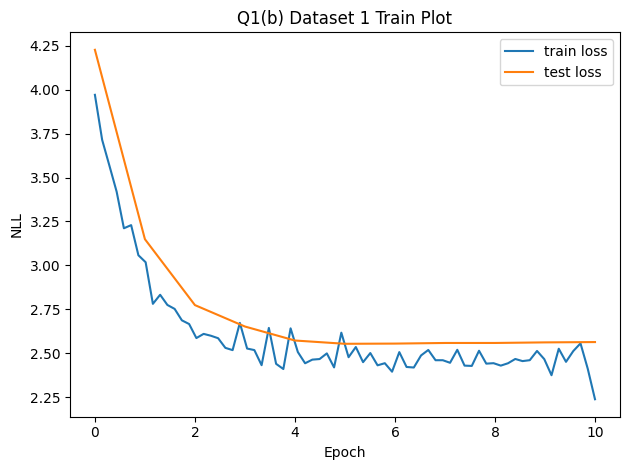

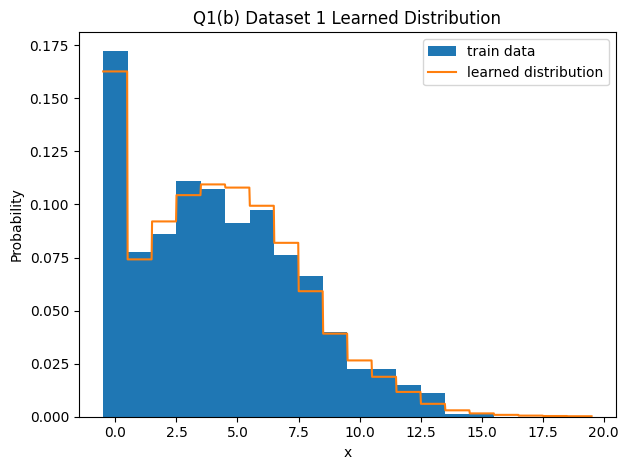

In [ ]:
q1_save_results(1, 'b', q1_b)

Train Epoch: 1 	Test Loss: 3.9590669572353363
Train Epoch: 2 	Test Loss: 3.8006518483161926
Train Epoch: 3 	Test Loss: 3.744755119085312
Train Epoch: 4 	Test Loss: 3.7206850796937943
Train Epoch: 5 	Test Loss: 3.7159601002931595
Train Epoch: 6 	Test Loss: 3.7180827111005783
Train Epoch: 7 	Test Loss: 3.71328504383564
Train Epoch: 8 	Test Loss: 3.7141708433628082
Train Epoch: 9 	Test Loss: 3.7178966253995895
Train Epoch: 10 	Test Loss: 3.7332336604595184
Final Test Loss: 3.7332


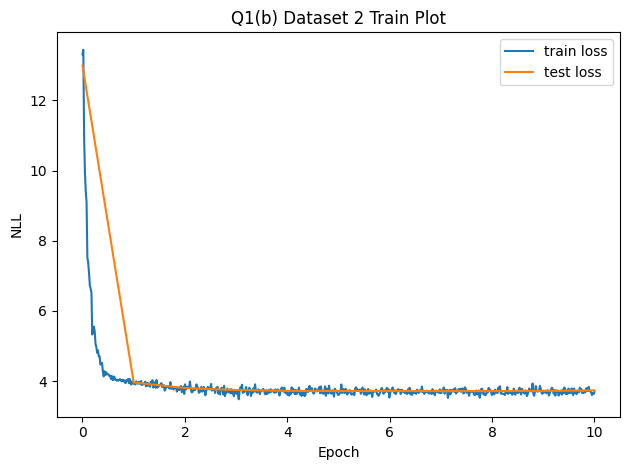

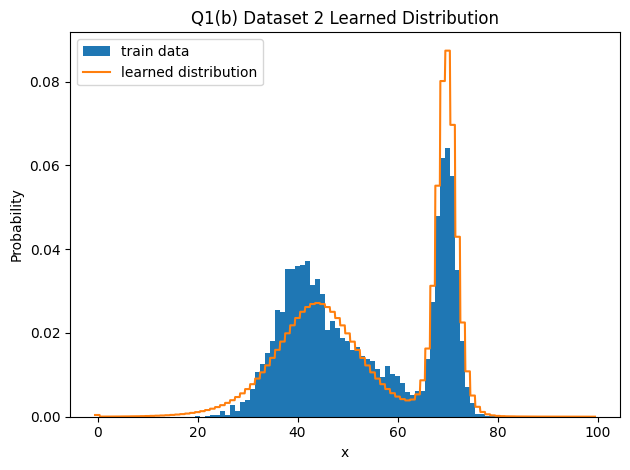

In [ ]:
q1_save_results(2, 'b', q1_b)

# Question 2 PixelCNNs

Now, you will train more powerful PixelCNN models on the shapes dataset and MNIST. In addition, we will extend to modeling colored datasets.

Run the cell below to visualize the two datasets binary datasets

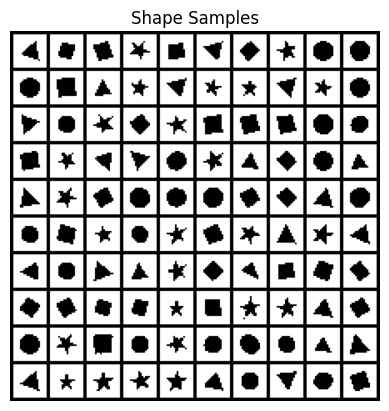

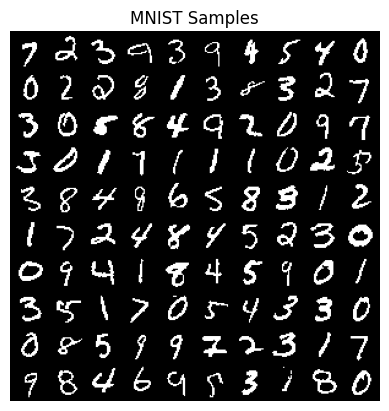

In [ ]:
visualize_q2a_data(1)
visualize_q2a_data(2)

## Part (a) PixelCNN on Shapes and MNIST
In this part, implement a simple PixelCNN architecture to model binary MNIST and shapes images (same as Q2(b), but with a PixelCNN).

We recommend the following network design:
* A $7 \times 7$ masked type A convolution
* $5$ $7 \times 7$ masked type B convolutions
* $2$ $1 \times 1$ masked type B convolutions
* Appropriate ReLU nonlinearities in-between
* 64 convolutional filters

And the following hyperparameters:
* Batch size 128
* Learning rate $10^{-3}$
* 10 epochs
* Adam Optimizer (this applies to all PixelCNN models trained in future parts)

Your model should output logits, after which you could apply a sigmoid over 1 logit, or a softmax over two logits (either is fine). It may also help to scale your input to $[-1, 1]$ before running it through the network. 

Training on the shapes dataset should be quick, and MNIST should take around 10 minutes

Checkout the Paper for more details: https://arxiv.org/abs/1601.06759

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model



Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
def q2_a(train_data, test_data, dset_id, n_filters=64, n_layers=5, n_samples=100,
         batch_size=128, epochs=10, lr=1e-3, device=None):
    """
    train_data: A (n_train, H, W, C) uint8 numpy array of binary images with values in {0, 1}
    test_data: A (n_test, H, W, C) uint8 numpy array of binary images with values in {0, 1}
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
    used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (n_samples, H, W, C) of samples with values in {0, 1}
    """
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"
    train_data = np.transpose(train_data, (0, 3, 1, 2))
    test_data = np.transpose(test_data, (0, 3, 1, 2))
    _, c, h, w = train_data.shape

    model = PixelCNN(c, 2, n_filters=n_filters, n_layers=n_layers).to(device)
    train_loader = DataLoader(IntDataset(train_data), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(IntDataset(test_data), batch_size=batch_size)
    train_losses, test_losses = train(model, train_loader, test_loader, lr=lr, epochs=epochs)
    samples = model.sample(n_samples, (h, w))

    samples = np.transpose(samples, (0, 2, 3, 1))
    return train_losses, test_losses, samples, model

### Results

Once you've implemented `q2_a`, execute the cells below to visualize and save your results



Train Epoch: 1 	Test Loss: 0.15734416080845726
Train Epoch: 2 	Test Loss: 0.13342061721616322
Train Epoch: 3 	Test Loss: 0.09570933236844009
Train Epoch: 4 	Test Loss: 0.07325438389347659
Train Epoch: 5 	Test Loss: 0.05804606030384699
Train Epoch: 6 	Test Loss: 0.052782376814219684
Train Epoch: 7 	Test Loss: 0.04914734926488665
Train Epoch: 8 	Test Loss: 0.04501074180006981
Train Epoch: 9 	Test Loss: 0.043406326013306774
Train Epoch: 10 	Test Loss: 0.04171907850023773
Final Test Loss: 0.0417


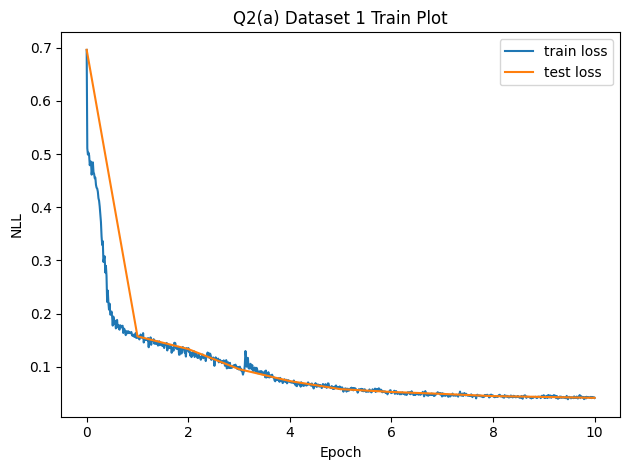

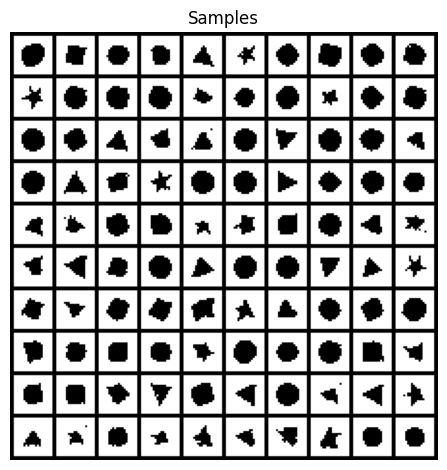

In [ ]:
model = q2ab_save_results(1, 'a', q2_a)

Train Epoch: 1 	Test Loss: 0.08721802072434486
Train Epoch: 2 	Test Loss: 0.08113166152299205
Train Epoch: 3 	Test Loss: 0.07916481943824623
Train Epoch: 4 	Test Loss: 0.07893396961160853
Train Epoch: 5 	Test Loss: 0.07745187588130371
Train Epoch: 6 	Test Loss: 0.07731597182116931
Train Epoch: 7 	Test Loss: 0.07736776552245586
Train Epoch: 8 	Test Loss: 0.07633301851492894
Train Epoch: 9 	Test Loss: 0.07633331738695313
Train Epoch: 10 	Test Loss: 0.07686751930019524
Final Test Loss: 0.0769


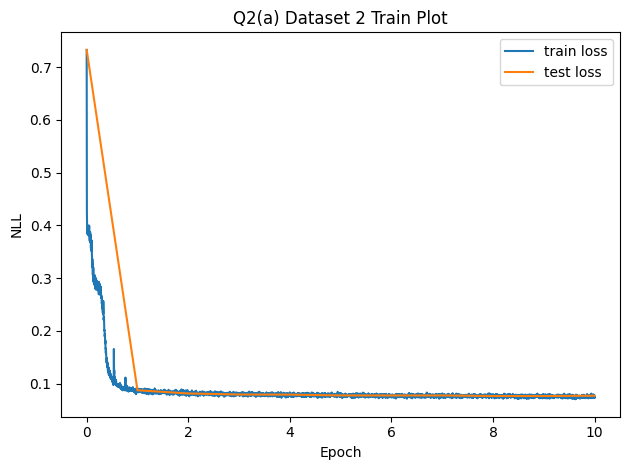

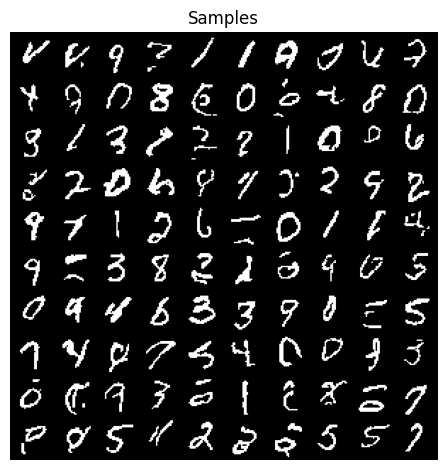

In [ ]:
model = q2ab_save_results(2, 'a', q2_a)

## Part (b) PixelCNN on Colored Shapes and MNIST: Independent Color Channels

For the next part, we'll work with color images (shapes and MNIST). Run the cell below to visualize the dataset.

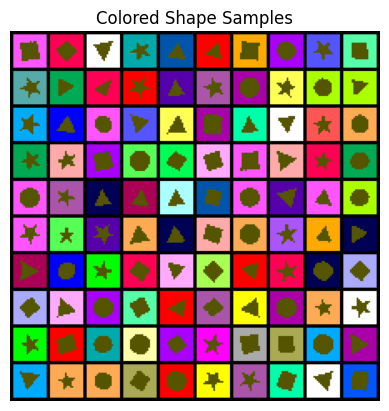

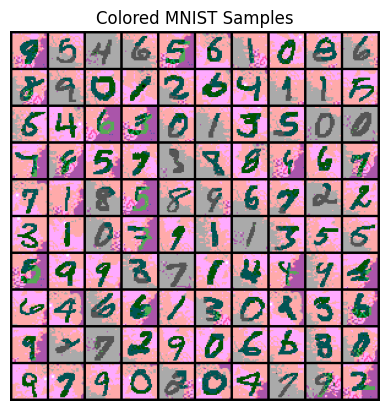

In [ ]:
visualize_q2b_data(1)
visualize_q2b_data(2)

Now, implement a PixelCNN to support RGB color channels (or augment your existing implementation). **First, implement a PixelCNN that assumes color channels as independent.** More formally, we model the following parameterized distribution:

$$p_\theta(x) = \prod_{i=1}^{HW}\prod_{c=1}^C p_\theta(x_i^c | x_{<i})$$

Here are some tips that you may find useful for designing and training these models:
* You will need a 4-way softmax for every prediction, as opposed to a 256-way softmax in the PixelCNN paper, since the dataset is quantized to two bits per color channel
* You can set the number of filters for each convolutions to 120. You can use the ReLU nonlinearity throughout.
* Use a stack of 8 residual block architecture from [Figure 5](https://arxiv.org/abs/1601.06759) but with 7 x 7 masked convolutions in the middle instead of 3 x 3 masked convolutions
* Consider using [layer normalization](https://arxiv.org/abs/1607.06450) to improve performance. However, be careful to maintain the autoregressive property.
* With a learning rate of $10^{-3}$ and a batch size of 128, it should take a few minutes to run on the shapes dataset, and about 50-60 minutes on MNIST.

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model



Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
def q2_b(train_data, test_data, dset_id, n_filters=120, n_layers=8,
         batch_size=128, epochs=15, lr=1e-3, grad_clip=1., n_samples=100, device=None):
    """
    train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
              used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (n_samples, H, W, C) of samples with values in {0, 1, 2, 3}
    """
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"
    train_data = np.transpose(train_data, (0, 3, 1, 2))
    test_data = np.transpose(test_data, (0, 3, 1, 2))
    _, c, h, w = train_data.shape

    model = PixelCNN(c, 4, n_filters=n_filters, n_layers=n_layers, res_block=True).to(device)
    train_loader = DataLoader(IntDataset(train_data), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(IntDataset(test_data), batch_size=batch_size)
    train_losses, test_losses = train(model, train_loader, test_loader, lr=lr, epochs=epochs, grad_clip=grad_clip)
    samples = model.sample(n_samples, (h, w))

    samples = np.transpose(samples, (0, 2, 3, 1))
    return train_losses, test_losses, samples, model

### Results

Once you've implemented `q2_b`, execute the cells below to visualize and save your results



Train Epoch: 1 	Test Loss: 0.33744078709019554
Train Epoch: 2 	Test Loss: 0.16634727641940117
Train Epoch: 3 	Test Loss: 0.12320955697860983
Train Epoch: 4 	Test Loss: 0.08270443913837273
Train Epoch: 5 	Test Loss: 0.1380147942238384
Train Epoch: 6 	Test Loss: 0.06593919659240378
Train Epoch: 7 	Test Loss: 0.059498823144369654
Train Epoch: 8 	Test Loss: 0.06799052779873212
Train Epoch: 9 	Test Loss: 0.05576321493006415
Train Epoch: 10 	Test Loss: 0.05072801849908299
Train Epoch: 11 	Test Loss: 0.04818923843817578
Train Epoch: 12 	Test Loss: 0.04830219141311116
Train Epoch: 13 	Test Loss: 0.04594661512722572
Train Epoch: 14 	Test Loss: 0.04393690689984295
Train Epoch: 15 	Test Loss: 0.044404336975680456
Final Test Loss: 0.0444


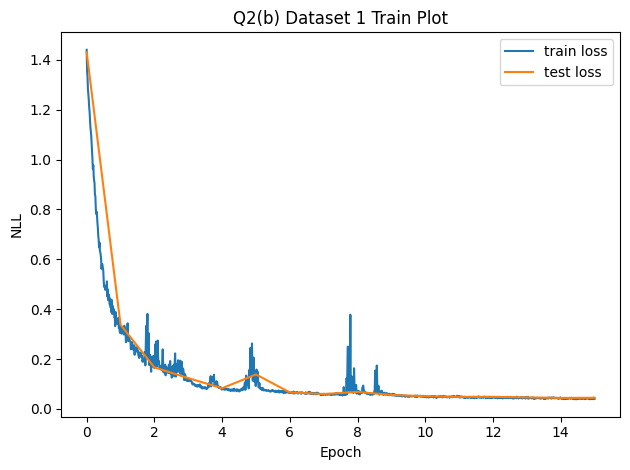

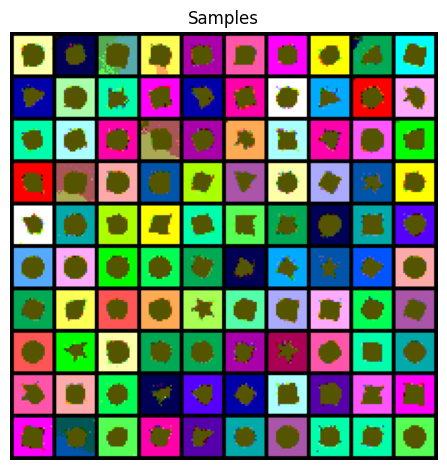

In [ ]:
model = q2ab_save_results(1, 'b', q2_b)

Train Epoch: 1 	Test Loss: 0.19226002806349646
Train Epoch: 2 	Test Loss: 0.12179719883052609
Train Epoch: 3 	Test Loss: 0.10074847795163529
Train Epoch: 4 	Test Loss: 0.09557504404949237
Train Epoch: 5 	Test Loss: 0.08984919429957113
Train Epoch: 6 	Test Loss: 0.0872778874597972
Train Epoch: 7 	Test Loss: 0.08562146579917473
Train Epoch: 8 	Test Loss: 0.08397891136664379
Train Epoch: 9 	Test Loss: 0.0834674661672568
Train Epoch: 10 	Test Loss: 0.0837354102655302
Train Epoch: 11 	Test Loss: 0.0823413833409925
Train Epoch: 12 	Test Loss: 0.08140438068893892
Train Epoch: 13 	Test Loss: 0.08061638681948939
Train Epoch: 14 	Test Loss: 0.08074401837738254
Train Epoch: 15 	Test Loss: 0.08121391678158241
Final Test Loss: 0.0812


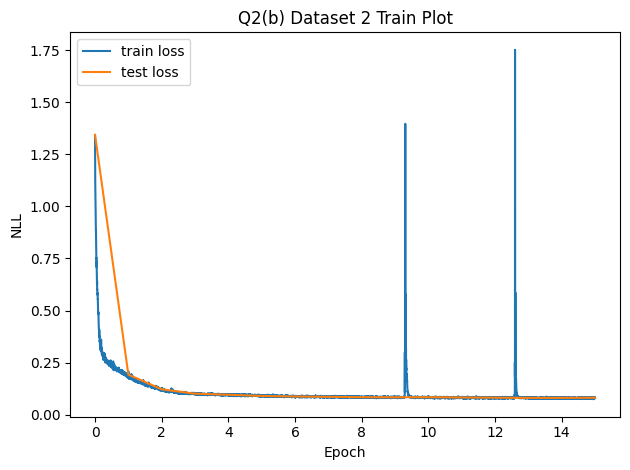

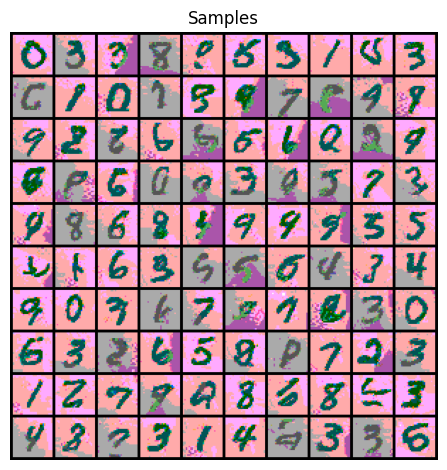

In [ ]:
model = q2ab_save_results(2, 'b', q2_b)

# Question 3: Causal Transformer - iGPT

Now we will move onto the current most popular and widespread autoregressive model, the transformer.

## Part (a) Autoregressive Transformer on Shapes and MNIST
In this part, implement a simple Autoregressive Transformer to model binary MNIST and shapes images (same as Q2(a), but with a Transformer). 

Some additional notes about your transformer implementation:
 * iGPT uses learned positional encodings. We recommend to use those here as well. However, you may also use sinusoidal positional encodings if you wish (see the [Attention is All You Need](https://arxiv.org/abs/1706.03762) paper)
 * Autoregressive transformer always predicts the **next** token, give prior tokens. iGPT has a special **\<bos\>** or beginning of sequence token at the start of every sequence every image. Make sure to include this in your implementation as well. You can generate unconditional sample by conditioning with the **\<bos\>** token.
 * While dropout is a common feature in transformer models, you do not need to add it (but may if you wish!).
 * Prebuilt transformers exist in some frameworks (i.e. pytorch). Don't just use an off the shelf implementation as the point of the exercise is to better understand the transformer architecture. Building the transformer from the ground up (use primitives such as Linear/Dense layers, LayerNorm, GeLU, Embedding)
 * Learning rate warmup and cos learning rate decay are often used when training transformers to improve training stability and improve performance. See if this helps your model! Try 1000 steps of warmup with a cosine learning rate decay.

Paper references
* [Attention Is All You Need](https://arxiv.org/abs/1706.03762) 
* [Generative Pretraining from Pixels](https://cdn.openai.com/papers/Generative_Pretraining_from_Pixels_V2.pdf) 
* [Language Models are Unsupervised Multitask Learners](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)

We recommend the following network design parameters:
* $d_{model}$: 128
* heads: 4
* layers: 2
* GeLU nonlinearities

And the following hyperparameters:
* Batch size: 64 or 32 or 16 (whichever fits in your GPU)
* Learning rate: $10^{-3}$
* 15 epochs or more
* Adam Optimizer (this applies to all Transformers models trained in future parts)

**You will provide these deliverables**

1. Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2. Report the final test set performance of your final model
3. 100 samples from the final trained model



In [ ]:
def q3_a(train_data, test_data, dset_id, d_model=128, n_layers=2, n_heads=4,
         batch_size=64, epochs=15, lr=1e-3, grad_clip=1., n_samples=100, device=None):
    """
    train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1}
    test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1}
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
            used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (n_samples, H, W, C) of samples with values in {0, 1}
    - model
    """
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"
    train_data = np.transpose(train_data, (0, 3, 1, 2))
    test_data = np.transpose(test_data, (0, 3, 1, 2))
    _, c, h, w = train_data.shape

    model = ImageGPT((c, h, w), 2, d_model=d_model, n_layers=n_layers, n_heads=n_heads).to(device)
    train_loader = DataLoader(IntDataset(train_data), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(IntDataset(test_data), batch_size=batch_size)
    train_losses, test_losses = train(model, train_loader, test_loader, lr=lr, epochs=epochs, grad_clip=grad_clip)
    samples = model.sample(n_samples)

    samples = np.transpose(samples, (0, 2, 3, 1))
    return train_losses, test_losses, samples, model

### Results

Once you've implemented `q3_a`, execute the cells below to visualize and save your results

Train Epoch: 1 	Test Loss: 0.06388382739584211
Train Epoch: 2 	Test Loss: 0.05209273944648219
Train Epoch: 3 	Test Loss: 0.04645363865813739
Train Epoch: 4 	Test Loss: 0.04378563643131458
Train Epoch: 5 	Test Loss: 0.041380590483756134
Train Epoch: 6 	Test Loss: 0.039760450399677516
Train Epoch: 7 	Test Loss: 0.03887260710479508
Train Epoch: 8 	Test Loss: 0.039028877995803325
Train Epoch: 9 	Test Loss: 0.038316648191129656
Train Epoch: 10 	Test Loss: 0.03713895511669173
Train Epoch: 11 	Test Loss: 0.03643816127113893
Train Epoch: 12 	Test Loss: 0.03664363962663731
Train Epoch: 13 	Test Loss: 0.03592907054953172
Train Epoch: 14 	Test Loss: 0.03550429762878888
Train Epoch: 15 	Test Loss: 0.035419492811804086
Final Test Loss: 0.0354


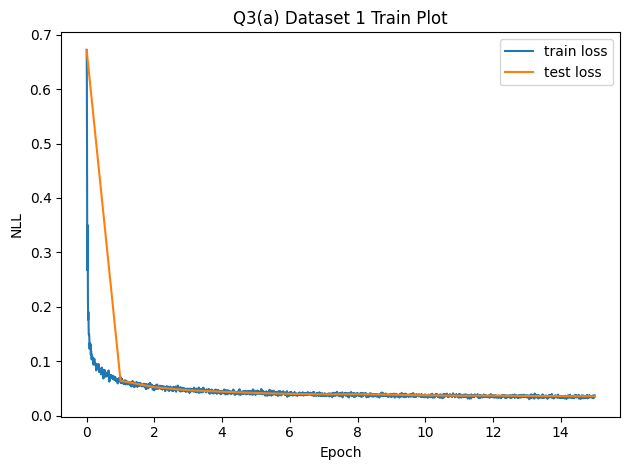

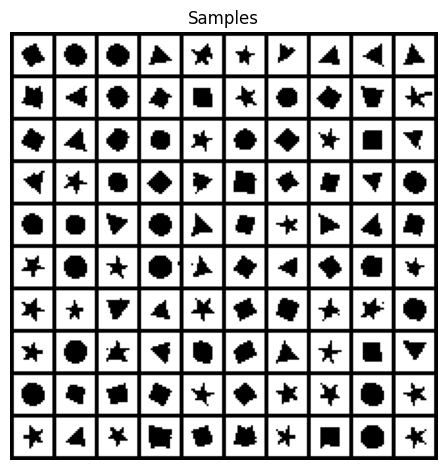

In [ ]:
model = q3ab_save_results(1, 'a', q3_a)

Train Epoch: 1 	Test Loss: 0.08059142591657152
Train Epoch: 2 	Test Loss: 0.07720617190667778
Train Epoch: 3 	Test Loss: 0.07522963291140879
Train Epoch: 4 	Test Loss: 0.0739576964146772
Train Epoch: 5 	Test Loss: 0.07334623922398135
Train Epoch: 6 	Test Loss: 0.07276987436280888
Train Epoch: 7 	Test Loss: 0.07243770470095288
Train Epoch: 8 	Test Loss: 0.07214654687863246
Train Epoch: 9 	Test Loss: 0.07166270209345849
Train Epoch: 10 	Test Loss: 0.07192800440795862
Train Epoch: 11 	Test Loss: 0.07138530577823615
Train Epoch: 12 	Test Loss: 0.07142149327192338
Train Epoch: 13 	Test Loss: 0.07127391478153551
Train Epoch: 14 	Test Loss: 0.07108610541008081
Train Epoch: 15 	Test Loss: 0.07106743961762471
Final Test Loss: 0.0711


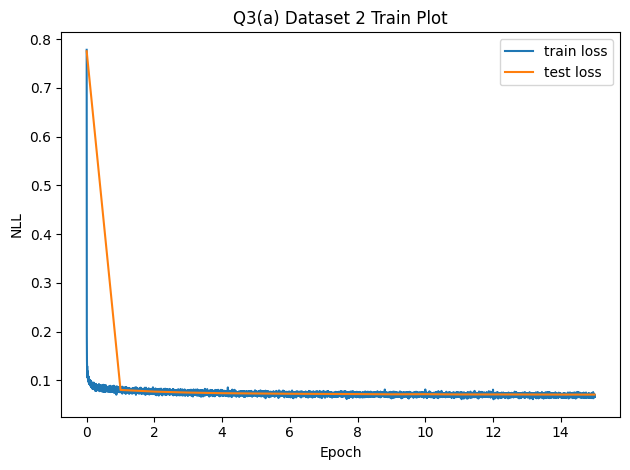

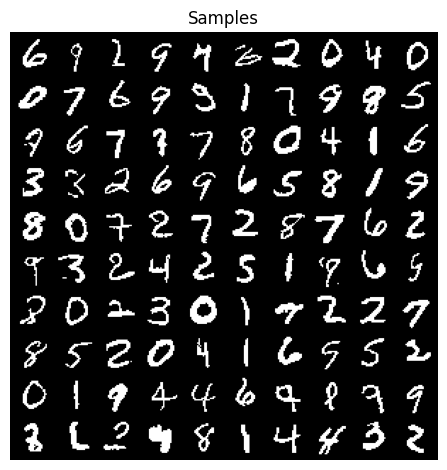

In [ ]:
model = q3ab_save_results(2, 'a', q3_a)

## Part (b) iGPT on Colored Shapes and MNIST

Now, implement an iGPT that models color. In order to reduce the length of token sequences, iGPT models each RGB pixel as a **single** token. This effectively reduces the context length from H*W*C to just H*W. iGPT does this through a k-means clustering approach. Because our images only each can only take on 4 values (2 bits) per channel, we can represent each pixel with 64 values (6 bits). Convert the dataset into an image of tokens and train iGPT on the colored shapes and MNIST dataset.

Checkout the iGPT paper for more details: [Generative Pretraining from Pixels](https://cdn.openai.com/papers/Generative_Pretraining_from_Pixels_V2.pdf) 

Training times and hyperparameter settings should be the same as part (a), except train for longer (15 epochs)

**You will provide these deliverables**

1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model


In [ ]:
def q3_b(train_data, test_data, dset_id, d_model=128, n_layers=2, n_heads=4,
         batch_size=64, epochs=15, lr=1e-3, grad_clip=1., n_samples=100, device=None):
    """
    train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
            used to set different hyperparameters for different datasets

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (n_samples, H, W, C) of samples with values in {0, 1, 2, 3}
    """
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"
    train_data = np.transpose(train_data, (0, 3, 1, 2))
    test_data = np.transpose(test_data, (0, 3, 1, 2))
    _, c, h, w = train_data.shape

    model = ImageGPT((c, h, w), 4, d_model=d_model, n_layers=n_layers, n_heads=n_heads).to(device)
    train_loader = DataLoader(IntDataset(train_data), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(IntDataset(test_data), batch_size=batch_size)
    train_losses, test_losses = train(model, train_loader, test_loader, lr=lr, epochs=epochs, grad_clip=grad_clip)
    samples = model.sample(n_samples)

    samples = np.transpose(samples, (0, 2, 3, 1))
    return train_losses, test_losses, samples, model

### Results

Once you've implemented `q3_b`, execute the cells below to visualize and save your results

Train Epoch: 1 	Test Loss: 0.09482700671528427
Train Epoch: 2 	Test Loss: 0.07701874713242894
Train Epoch: 3 	Test Loss: 0.07454761778804618
Train Epoch: 4 	Test Loss: 0.0657555946266987
Train Epoch: 5 	Test Loss: 0.06213034516279126
Train Epoch: 6 	Test Loss: 0.05785133338100474
Train Epoch: 7 	Test Loss: 0.05473189842952809
Train Epoch: 8 	Test Loss: 0.052407139151448935
Train Epoch: 9 	Test Loss: 0.05161068987258723
Train Epoch: 10 	Test Loss: 0.04697223841934137
Train Epoch: 11 	Test Loss: 0.04579795576946836
Train Epoch: 12 	Test Loss: 0.0446384298339696
Train Epoch: 13 	Test Loss: 0.043663258546255
Train Epoch: 14 	Test Loss: 0.043125998228788376
Train Epoch: 15 	Test Loss: 0.04176659058307258
Final Test Loss: 0.0418


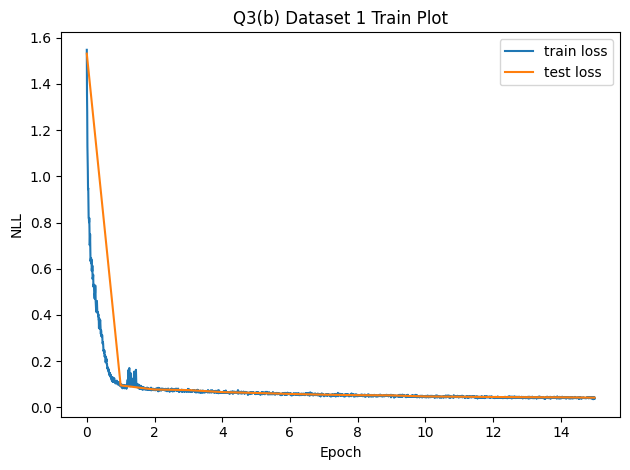

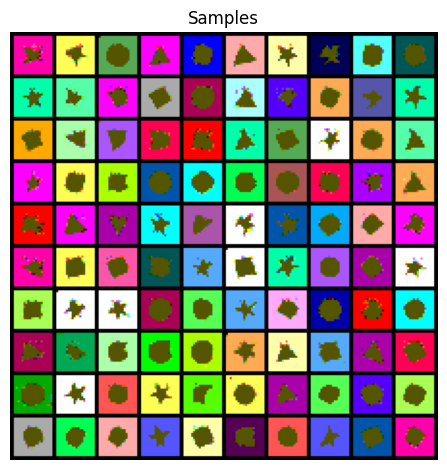

In [ ]:
model = q3ab_save_results(1, 'b', q3_b)

Train Epoch: 1 	Test Loss: 0.17184236484348395
Train Epoch: 2 	Test Loss: 0.1406181634516473
Train Epoch: 3 	Test Loss: 0.12204171570053526
Train Epoch: 4 	Test Loss: 0.10985773089964679
Train Epoch: 5 	Test Loss: 0.10037536957081716
Train Epoch: 6 	Test Loss: 0.09614472451863015
Train Epoch: 7 	Test Loss: 0.09219163295569693
Train Epoch: 8 	Test Loss: 0.09111425323281319
Train Epoch: 9 	Test Loss: 0.08820563711368354
Train Epoch: 10 	Test Loss: 0.08693366839437727
Train Epoch: 11 	Test Loss: 0.08527140836616989
Train Epoch: 12 	Test Loss: 0.08401171820368736
Train Epoch: 13 	Test Loss: 0.083301303825181
Train Epoch: 14 	Test Loss: 0.08237397461939769
Train Epoch: 15 	Test Loss: 0.0823866318270659
Final Test Loss: 0.0824


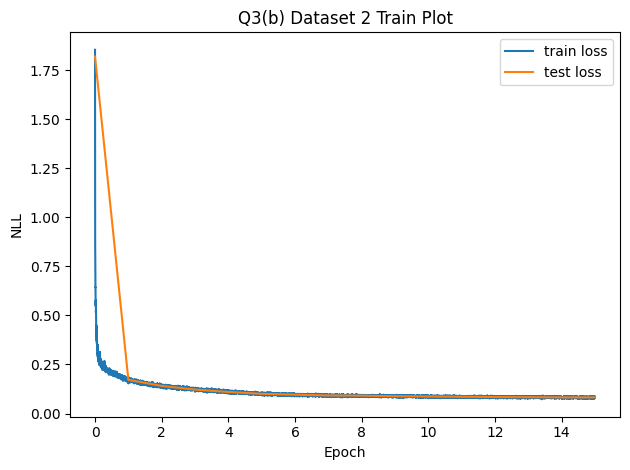

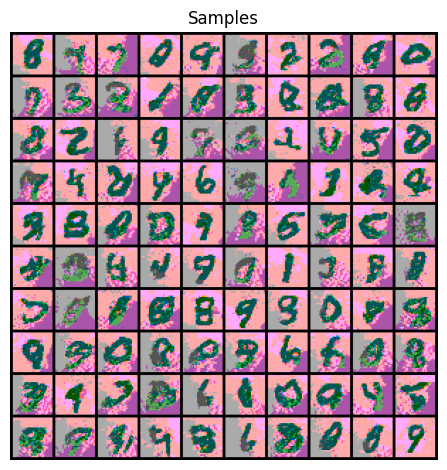

In [ ]:
model = q3ab_save_results(2, 'b', q3_b)

## Part (c) K, V Caching for Improved Inference
You may have noticed that generation from the transformer is quite slow. Part of this is just due to the autoregressive nature. However, another part is due to some computational inefficiency. At each forward pass of the model, we are performing repeat computation of the past sequence. Specifically, we can cache the key and values at the multi attention layer to more quickly predict at each step.

In self-attention, a sequence is processed by generating three vectors for each element in the sequence: a Query (Q), a Key (K), and a Value (V). These vectors are then used to compute attention scores and subsequently the output of the attention layer.
Mathematically, this can be represented as:
 * For each index $i$, compute $Q_i$, $K_i$, $V_i$ for the current element
 * Retrieve $K_{<i}$ and $V_{<i}$ from the cache (where $<i$ denotes all indices before the current one)
 * Compute the attention output using $Q_i$, $[K_{<i}, K_i]$, $[V_{<i}, V_i]$


Next implement caching for your transformer to make inference more efficient by modifying your self attention. Use caching for inference in the future problems for faster generation! (Note caching is only used during inference). You will use the same dataset as in part B, dataset 2 of this question (colored mnist). No training is required in this section, feel free to reuse the model you trained in part B, dataset 2.

**You will provide these deliverables**

1. Over the course of inference, measure the time for the forward pass over the total sequence length with and without caching.
3. 100 samples from the final trained model using the caching inference pipeline.



In [ ]:
model = ImageGPT((3, 28, 28), 4, d_model=128, n_layers=2, n_heads=4).cuda()
model.load_state_dict(torch.load("data/q3-2-b.pkl"))

<All keys matched successfully>

In [ ]:
def q3_c(model, n_samples=100):
    """
    model: iGPT model

    Returns
    - a (# sampling steps,) numpy array of time per sampling iteration, without caching
    - a (# sampling steps,) numpy array of time per sampling iteration, with without caching
    - a numpy array of size (n_samples, H, W, C) of samples with values in {0, 1, 2, 3} (sample generated without caching)
    - a numpy array of size (n_samples, H, W, C) of samples with values in {0, 1, 2, 3} (sample generated with caching)
    """
    samples_no_cache, time_list_no_cache = model.sample(n_samples, kv_cache=False, track_time=True)
    samples_with_cache, time_list_with_cache = model.sample(n_samples, kv_cache=True, track_time=True)
    samples_no_cache = np.transpose(samples_no_cache, (0, 2, 3, 1))
    samples_with_cache = np.transpose(samples_with_cache, (0, 2, 3, 1))
    return time_list_no_cache, time_list_with_cache, samples_no_cache, samples_with_cache

### Results

Once you've implemented `q3_c`, execute the cells below to visualize and save your results



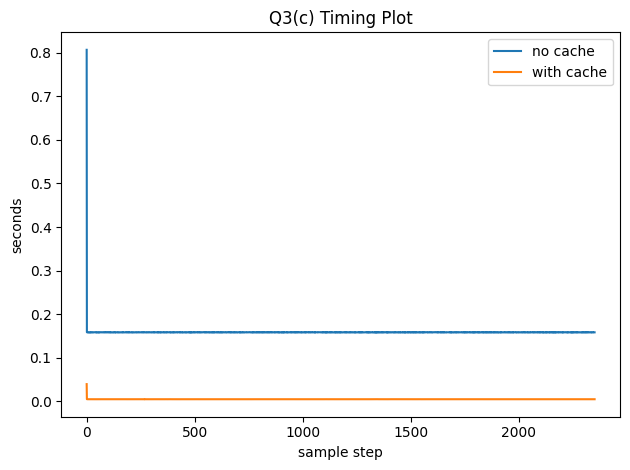

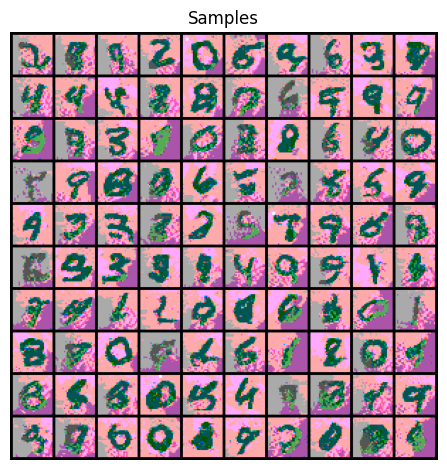

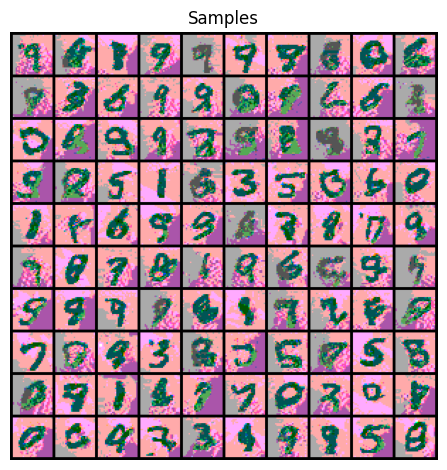

In [ ]:
q3c_save_results(2, q3_c, model)

# Question 4: Causal Transformer: Tokenized Images

## Image Tokenization with Vector Quantization

## Part (a) Image Quantization

Above, we implemented iGPT, which autoregressivly predicts raw pixels. Transformers have quadratic complexity in the sequence length which prevents this naive approach from scaling well to large images.

The space of natural images often contains very correlated information. This suggests we can learn a reduced representation. VQVAE is a method that does just that, learning to map images to a more compact discrete set of tokens. We will cover this method in more detail in future lectures. The only thing you need to know now is that we can learn an encoder (and corresponding decoder), which can extract a discrete representation from an image. 

If you are curious, checkout the VQVAE paper to learn more: https://arxiv.org/abs/1711.00937 (we will cover this in a future lecture though!)

In this part, we provide a pre-trained VQVAE model, which consists of:
 * encoder to tokenize the images
 * the decoder to recover the image
 * a token vocabulary of VQVAE_MODEL.n_embeddings

Note that VQVAE encoding process is lossy, so the decoded images will not be the exact same as the input. Some blurriness in the recovered image is to be expected. The docstrings of the relevant methods you will need for the VQVAE_MODEL are provided below for your convenience. 

We will use 2 colored mnist datasets in this part. The first is the same dataset used in previous parts. The second, hads a colored digit on a differently colored background. We will call these datasets Colored MNIST and Colored MNIST v2. Note that the vqvae is trained per dataset.

**You will provide these deliverables**

1. Use the provided encoder model to quantize the images then inspect the recovered images by applying the decoder for each of the two datasets

In [ ]:
# @property
# def n_embeddings(self) -> int:
#     """The size of the token vocabulary"""
#
# def quantize(self, x: np.ndarray) -> np.ndarray:
#     """Quantize an image x.
#
#     Args:
#         x (np.ndarray, dtype=int): Image to quantize. shape=(batch_size, 28, 28, 3). Values in [0, 3].
#
#     Returns:
#         np.ndarray: Quantized image. shape=(batch_size, 7, 7). Values in [0, n_embeddings).
#     """
#
# def decode(self, z_index: np.ndarray) -> np.ndarray:
#     """Decode a quantized image.
#
#     Args:
#         z_index (np.ndarray, dtype=int): Quantized image. shape=(batch_size, 7, 7). Values in [0, n_embeddings).
#
#     Returns:
#         np.ndarray: Decoded image. shape=(batch_size, 28, 28, 3). Values in [0, 3].
#     """
# 

In [5]:
def q4_a(images, vqvae):
    """
    images: (B, H, W, C), the images to pass through the encoder and decoder of the vqvae
    vqvae: a vqvae model, trained on the relevant dataset

    Returns
    - a numpy array of size (B, H, W, C) of the decoded image
    """
    autoencoded_images = vqvae.decode(vqvae.quantize(images))
    return autoencoded_images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


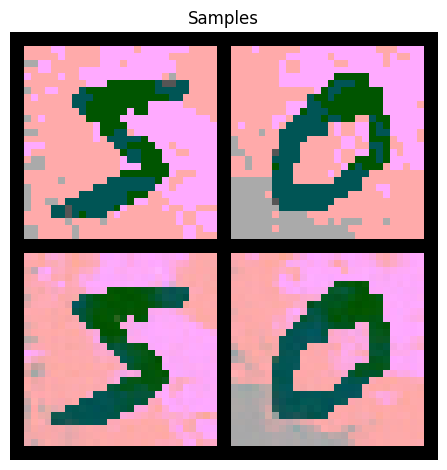

In [6]:
q4a_save_results(1, q4_a)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


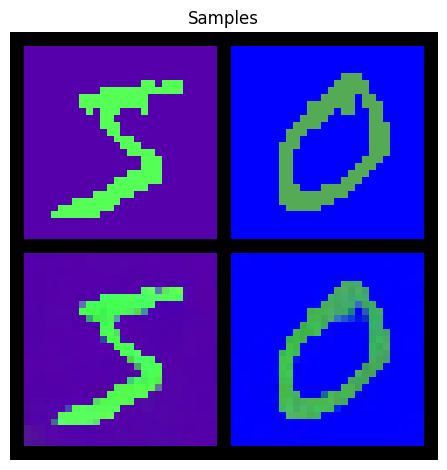

In [7]:
q4a_save_results(2, q4_a)

## Part (b) Autoregressive Transformer on Colored Shapes and MNIST with Vector Quantization

We can use the VQVAE to tokenize an image dataset. This will result in a much smaller sequence length than the approach we tried in Question 3(b). For this part, train a transformer on the dataset tokenized by the VQVAE.

This is a simplified version of the approach used in VQGAN [VQGAN](https://arxiv.org/abs/2012.09841) -> Section 3.2: Learning the Composition of Images with Transformers (Again, we will cover this in more detail in a future lecture!)

Update the following hyperparameters:
* layers: 4 (we can train a bigger transformer now since less memory is used per input!)
* 30 epochs

**You will provide these deliverables**

1. Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2. Report the final test set performance of your final model
3. 100 samples from the final trained model

In [ ]:
def q4_b(train_data, test_data, dset_id, vqvae, d_model=128, n_layers=4, n_heads=4,
         batch_size=64, epochs=30, lr=1e-3, grad_clip=1., n_samples=100, device=None):
    """
    train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
            used to set different hyperparameters for different datasets
    vqvae: a vqvae model, trained on dataset dset_id

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (n_samples, H, W, C) of samples with values in {0, 1, 2, 3}
    """
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"
    train_data = vqvae.quantize(train_data)[:, None, :, :]
    test_data = vqvae.quantize(test_data)[:, None, :, :]
    _, c, h, w = train_data.shape

    model = ImageGPT((c, h, w), vqvae.n_embeddings, d_model=d_model, n_layers=n_layers, n_heads=n_heads).to(device)
    train_loader = DataLoader(IntDataset(train_data), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(IntDataset(test_data), batch_size=batch_size)
    train_losses, test_losses = train(model, train_loader, test_loader, lr=lr, epochs=epochs, grad_clip=grad_clip)
    samples = model.sample(n_samples, kv_cache=True)

    samples = vqvae.decode(samples[:, 0, :, :])
    return train_losses, test_losses, samples, model

### Results

Once you've implemented `q4_b`, execute the cells below to visualize and save your results



Train Epoch: 1 	Test Loss: 5.292252224721726
Train Epoch: 2 	Test Loss: 5.184837569097045
Train Epoch: 3 	Test Loss: 5.08353464466751
Train Epoch: 4 	Test Loss: 5.041233220677467
Train Epoch: 5 	Test Loss: 4.992877298099979
Train Epoch: 6 	Test Loss: 4.9753684025661205
Train Epoch: 7 	Test Loss: 4.962835743169117
Train Epoch: 8 	Test Loss: 4.946028843047513
Train Epoch: 9 	Test Loss: 4.935539327609312
Train Epoch: 10 	Test Loss: 4.919235900708824
Train Epoch: 11 	Test Loss: 4.8951154180393095
Train Epoch: 12 	Test Loss: 4.883526556051461
Train Epoch: 13 	Test Loss: 4.886162712315845
Train Epoch: 14 	Test Loss: 4.877340544560912
Train Epoch: 15 	Test Loss: 4.861894643990097
Train Epoch: 16 	Test Loss: 4.855468628512826
Train Epoch: 17 	Test Loss: 4.85987391745209
Train Epoch: 18 	Test Loss: 4.850788177198665
Train Epoch: 19 	Test Loss: 4.868051790128089
Train Epoch: 20 	Test Loss: 4.8426980334482375
Train Epoch: 21 	Test Loss: 4.853887752362877
Train Epoch: 22 	Test Loss: 4.845872599607

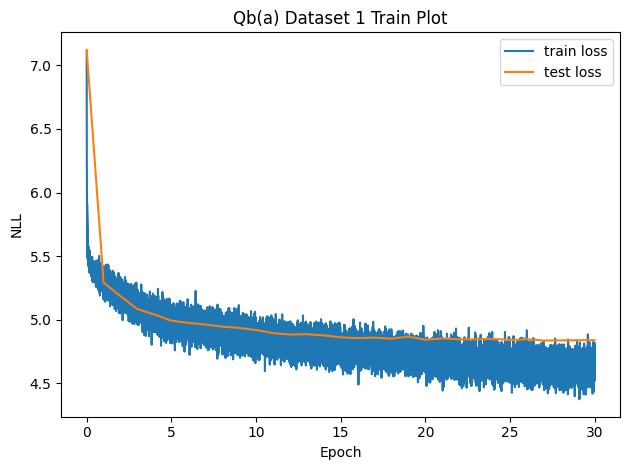

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


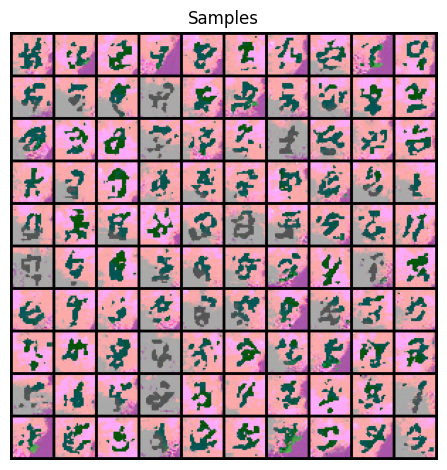

In [ ]:
model = q4b_save_results(1, q4_b)

Train Epoch: 1 	Test Loss: 5.553619919309191
Train Epoch: 2 	Test Loss: 5.275145722042983
Train Epoch: 3 	Test Loss: 4.969385141020368
Train Epoch: 4 	Test Loss: 4.838134938744223
Train Epoch: 5 	Test Loss: 4.77397693342464
Train Epoch: 6 	Test Loss: 4.694199595481726
Train Epoch: 7 	Test Loss: 4.612728553213132
Train Epoch: 8 	Test Loss: 4.5767848112021285
Train Epoch: 9 	Test Loss: 4.54297601189583
Train Epoch: 10 	Test Loss: 4.519510913047061
Train Epoch: 11 	Test Loss: 4.53087601084618
Train Epoch: 12 	Test Loss: 4.428794374891147
Train Epoch: 13 	Test Loss: 4.439630204704916
Train Epoch: 14 	Test Loss: 4.419381184183108
Train Epoch: 15 	Test Loss: 4.484429912202677
Train Epoch: 16 	Test Loss: 4.4060784935191935
Train Epoch: 17 	Test Loss: 4.409022176341646
Train Epoch: 18 	Test Loss: 4.3671401017790386
Train Epoch: 19 	Test Loss: 4.4085277691008935
Train Epoch: 20 	Test Loss: 4.351761978902634
Train Epoch: 21 	Test Loss: 4.342489710279331
Train Epoch: 22 	Test Loss: 4.330540982021

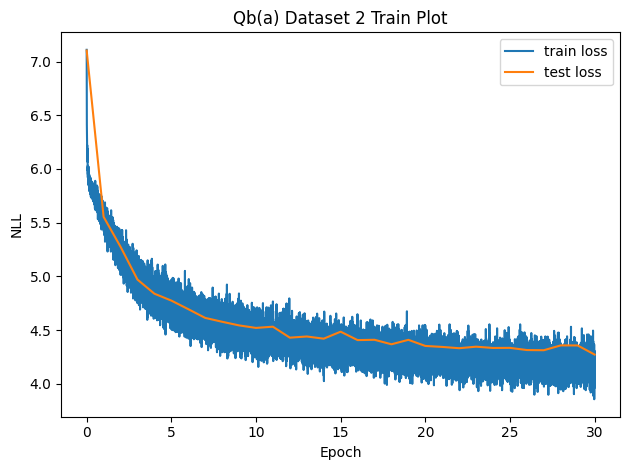

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


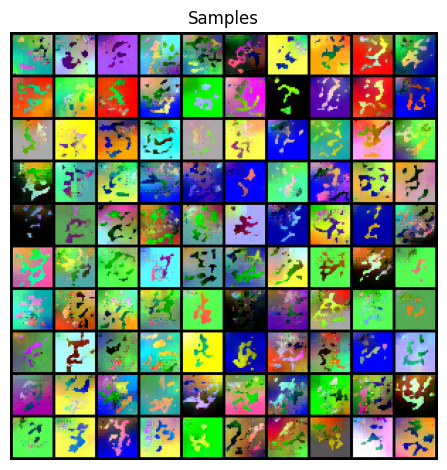

In [ ]:
model = q4b_save_results(2, q4_b)

# Question 5: Causal Transformer: Text

Now lets consider text! You are probably already familiar with autoregressive transformers for text, now more commonly known as Large Language Modesl (LLMs).
We will now implement a simplified version.

We will be detailing with a [small poetry dataset](https://huggingface.co/datasets/merve/poetry). See some of the data below.

In [ ]:
visualize_q5_data()

Sample 1
Sweetest love, I do not go,
         For weariness of thee,
Nor in hope the world can show
         A fitter love for me;
                But since that I
Must die at last, 'tis best
To use myself in jest
         Thus by feign'd deaths to die.

Yesternight the sun went hence,
         And yet is here today;
He hath no desire nor sense,
         Nor half so short a way:
                Then fear not me,
But believe that I shall make
Speedier journeys, since I take
         More wings and spurs than he.

O how feeble is man's power,
         That if good fortune fall,
Cannot add another hour,
         Nor a lost hour recall!
                But come bad chance,
And we join to'it our strength,
And we teach it art and length,
         Itself o'er us to'advance.

When thou sigh'st, thou sigh'st not wind,
         But sigh'st my soul away;
When thou weep'st, unkindly kind,
         My life's blood doth decay.
                It cannot be
That thou lov'st me, as thou say'st,
If in t

## Part (a) Modeling Text
Train a transformer on the poetry dataset.

Data Preprocessing:
* We will use a simple method to tokenize the data. We will convert each unique character into a token. (Current LLMs use more sophisticated tokenizers, most commonly, [byte-pair encoding](https://huggingface.co/learn/nlp-course/chapter6/5?fw=pt))
* Previously we have leveraged a **\<bos\>** as part of the model, just like iGPT. For text, we may not always sample a sequence that starts at the beginning. Instead, we will add the **\<bos\>** token to the beginning of every sequence in the dataset, and remove the **\<bos\>** token from the model.
* Another problem is that the model must know when to stop sampling. This is done by appending an **\<eos\>**, or end of sequence token at the end of every sequence in the dataset.
* We can now convert the sequence into subsequences of size context_length, for training!

We recommend the following hyperparameters:
* Sequence length: 128
* 5 epochs

**You will provide these deliverables**

1. Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2. Report the final test set performance of your final model
3. Provide **5 unconditional samples** of **128 characters** showcasing the model text generation capabilities (text samples should stop after **\<eos\>**. Text after **\<eos\>** can be removed in post processing)

In [38]:
def q5_a(train_text, test_text, encoder, max_len=128, d_model=128, n_layers=4, n_heads=4,
         batch_size=64, epochs=150, lr=1e-3, grad_clip=1., n_samples=5, device=None):
    """
    train_text: list[str] Train text sequences.
    test_text: list[str] Test text sequences.

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a list of 5 (str), 5 generated samples from the model.
    """
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"
    bos_ind = encoder.encoder['<bos>']
    eos_ind = encoder.encoder['<eos>']
    train_set = SeqDatasetWeight([encoder.encode(text) for text in train_text], max_len=max_len+2, pad_value=eos_ind, temperature=0.3)
    test_set = SeqDatasetWeight([encoder.encode(text) for text in test_text], max_len=max_len+2, pad_value=eos_ind, temperature=0.3)

    model = GPT(len(encoder), bos_ind=bos_ind, eos_ind=eos_ind, max_len=max_len, d_model=d_model, n_layers=n_layers, n_heads=n_heads).to(device)
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, collate_fn=train_set.get_collate())
    test_loader = DataLoader(test_set, batch_size=batch_size, collate_fn=test_set.get_collate())
    train_losses, test_losses = train(model, train_loader, test_loader, lr=lr, epochs=epochs, grad_clip=grad_clip)
    samples = model.sample(n_samples, max_len=max_len, kv_cache=True)

    text_samples = [encoder.decode(sample) for sample in samples]
    return train_losses, test_losses, text_samples, model

### Results

Once you've implemented `q5_a`, execute the cells below to visualize and save your results



Train Epoch: 1 	Test Loss: 2.4622437953948975
Train Epoch: 2 	Test Loss: 2.365838050842285
Train Epoch: 3 	Test Loss: 2.297839403152466
Train Epoch: 4 	Test Loss: 2.2744390964508057
Train Epoch: 5 	Test Loss: 2.2281277179718018
Train Epoch: 6 	Test Loss: 2.143167734146118
Train Epoch: 7 	Test Loss: 2.0484495162963867
Train Epoch: 8 	Test Loss: 1.9467216730117798
Train Epoch: 9 	Test Loss: 1.871862769126892
Train Epoch: 10 	Test Loss: 1.8648244142532349
Train Epoch: 11 	Test Loss: 1.815934658050537
Train Epoch: 12 	Test Loss: 1.8056646585464478
Train Epoch: 13 	Test Loss: 1.7578675746917725
Train Epoch: 14 	Test Loss: 1.7429511547088623
Train Epoch: 15 	Test Loss: 1.7279369831085205
Train Epoch: 16 	Test Loss: 1.7062162160873413
Train Epoch: 17 	Test Loss: 1.6517374515533447
Train Epoch: 18 	Test Loss: 1.655608057975769
Train Epoch: 19 	Test Loss: 1.6460098028182983
Train Epoch: 20 	Test Loss: 1.6421809196472168
Train Epoch: 21 	Test Loss: 1.615850806236267
Train Epoch: 22 	Test Loss: 1

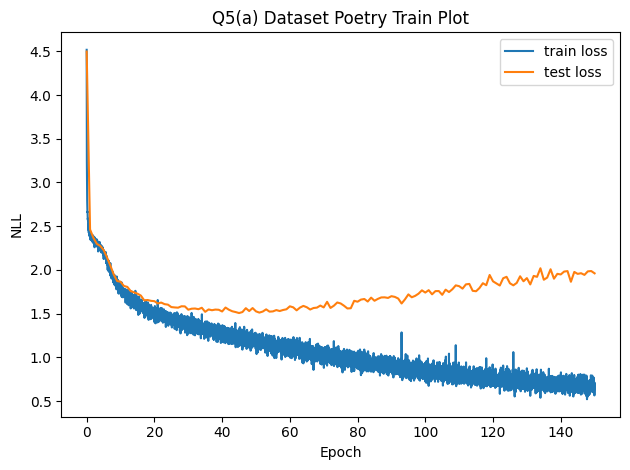

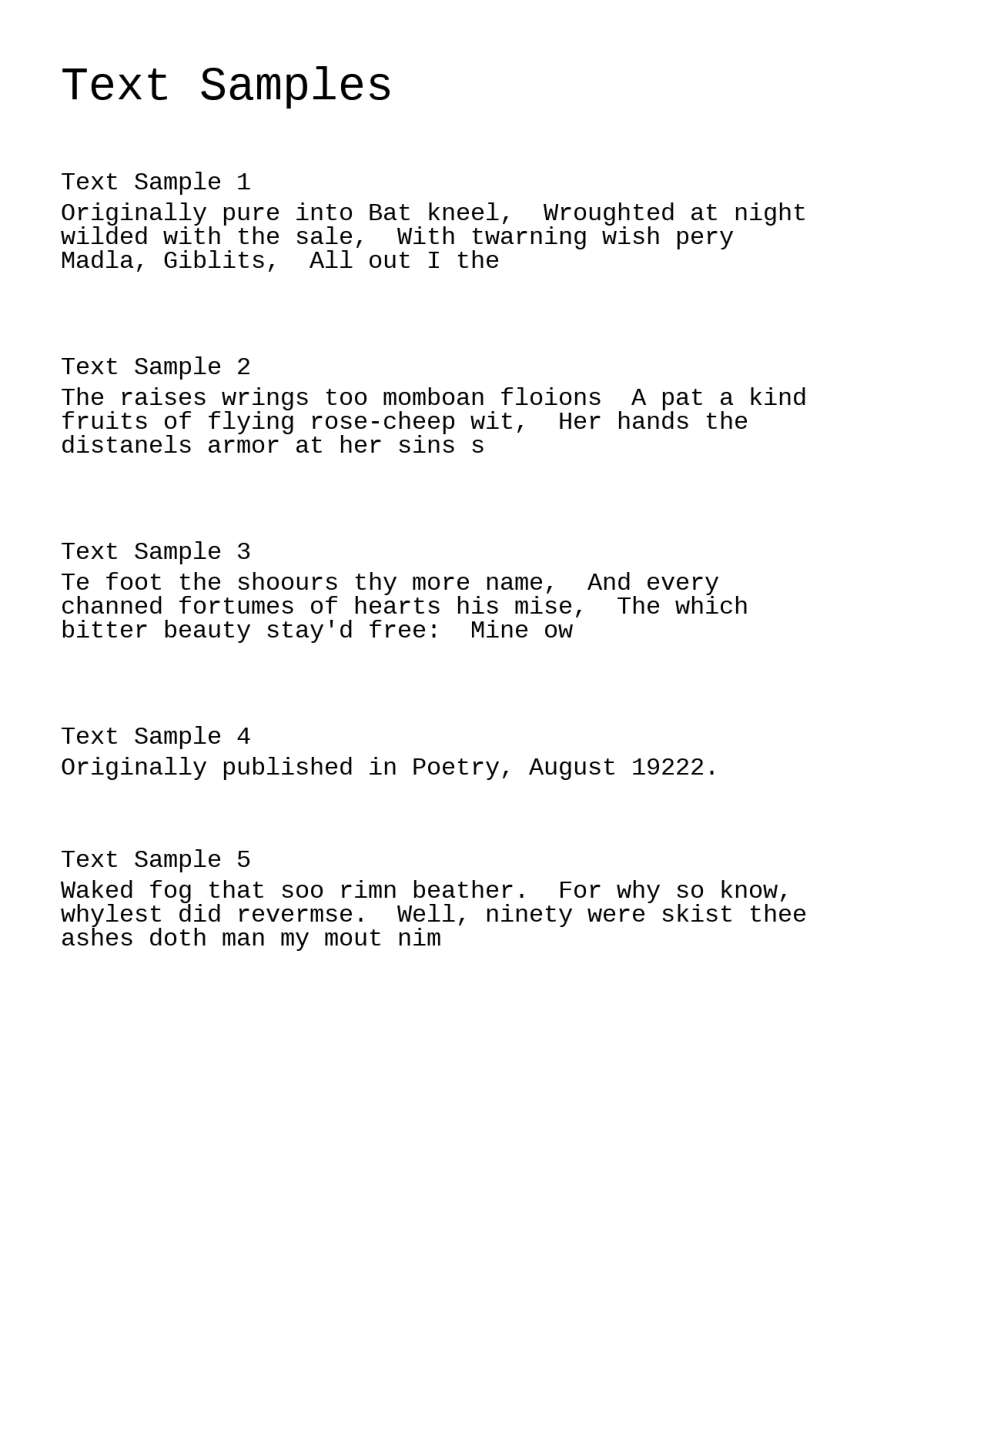

In [39]:
model = q5a_save_results(q5_a)

# Question 6: Causal Transformer: Multimodal

So far, we have been dealing only with autoregressive generation of a single modality. Now we will train a model that operates on multiple modalities!

We will use the text labeled colored MNIST dataset, which has a text description of the MNIST image. Run the cell below to visualize the data along with the text annotation. This is the Colored MNIST v2 dataset, which also comes with these text labels.

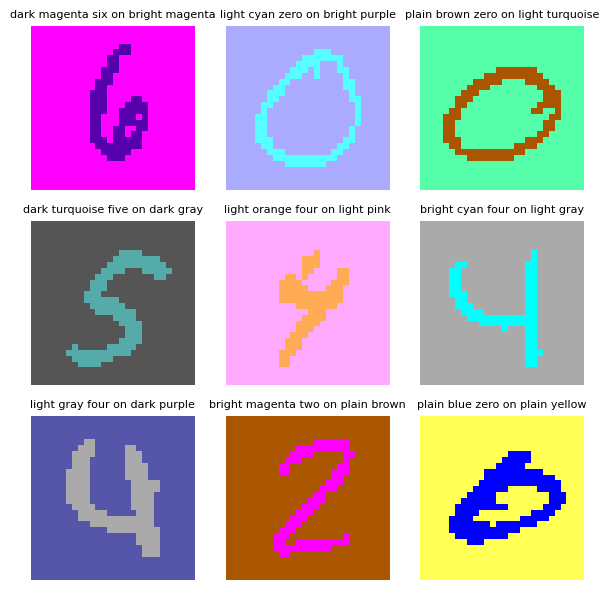

In [ ]:
visualize_q6_data()

## Part (a) Multimodal Text and Image Generation
Implement and train an autoregressive (AR) model capable of handling both text and image data. The model should be designed to process sequences composed of concatenated text and image tokens in both orders (text followed by images and images followed by text). Additionally, the model should be capable of generating unconditional text and image samples.

Data Preprocessing:
* Text Tokens: Map each unique word in the text data to a unique token. (Note that all text descriptions contain the exact same amount of words. This simplifies text processing, as you won't have to deal with sequences of different lengths as in Question 5)
* Image Tokens: Quantize the image data into tokens using the VQVAE tokenizer from Problem 4.
* In this problem, we have 2 modalities. Introduce an **\<end of text\>** token and an **\<end of image\>** token. After seeing such a token, the model should switch to sampling the next modality.
* Formulate batches as sequences of concat([**\<end of image\>**, text_tokens, **\<end of text\>**, image_tokens]) and concat([**\<end of text\>**, image_tokens, **\<end of image\>**, text_tokens]). With a 50/50 split between each ordering.

Inference:
* During inference, we cannot mix modality tokens. During sampling we can restrict the logits to only be within the relevant modality.
* After **\<end of image\>**, only allow the model to sample text tokens (including **\<end of text\>**)
* After **\<end of text\>**, only allow the model to sample image tokens (including **\<end of image\>**)
* At the very start (conditioned on the **\<bos\>** token, only allow the model to sample one of (**\<end of image\>** or **\<end of text\>**))
* As the model may not always correctly sample the **\<end of image\>** token before the image ends, you may add a rule to force the model to always sample the correct number of image tokens (49 tokens).

You can use the same hyperparameters as in 4(b) (but of course, feel free to tune your model to achieve better performance)

**You will provide these deliverables**

1. Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2. Report the final test set performance of your final model
3. 9 conditional samples based on provided text.
4. 9 conditional samples based on provided images.
5. 9 unconditional samples showcasing the model's capability in generating standalone text and images.

In [46]:
def q6_a(train_data, test_data, train_text, test_text, image_test_prompt, text_test_prompt, vqvae, encoder,
         max_len=6, d_model=128, n_layers=4, n_heads=4, batch_size=64, epochs=20, lr=1e-3, grad_clip=1., n_samples=9, device=None):
    """
    train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
    train_text: list[str] Text data associated with each training image.
    test_text: list[str] Text data associated with each test image.
    image_test_prompt: (n_samples, H, W, C) Image data used for generating conditional text samples during testing.
    text_test_prompt: list of n_samples strings Text prompts used for generating conditional image samples during testing.
    vqvae: a vqvae model, trained on the relevant dataset

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a list of n_samples (image, text), corresponding to the image conditioned samples
    - a list of n_samples (image, text), corresponding to the text conditions samples
    - a list of n_samples (image, text), corresponding to unconditional samples
    """
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"
    DataLoader(train_data, batch_size=batch_size)
    train_data = batch_tensor_apply(torch.FloatTensor(train_data[:1000]), vqvae.quantize)[:, None, :, :]
    test_data = batch_tensor_apply(torch.FloatTensor(test_data), vqvae.quantize)[:, None, :, :]
    _, c, h, w = train_data.shape
    bos_ind = encoder.encoder['<bos>']
    eos_ind = encoder.encoder['<eos>']

    train_set = MultimodalDataset(train_data, [encoder.encode(text) for text in train_text[:1000]], max_len=max_len+2, pad_value=eos_ind)
    test_set = MultimodalDataset(test_data, [encoder.encode(text) for text in test_text], max_len=max_len+2, pad_value=eos_ind)

    model = MultimodalGPT(
        (c, h, w), vqvae.n_embeddings, len(encoder),
        bos_ind=bos_ind, eos_ind=eos_ind, max_len=max_len, d_model=d_model, n_layers=n_layers, n_heads=n_heads
    ).to(device)
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, collate_fn=train_set.get_collate())
    test_loader = DataLoader(test_set, batch_size=batch_size, collate_fn=test_set.get_collate())
    train_losses, test_losses = train(model, train_loader, test_loader, lr=lr, epochs=epochs, grad_clip=grad_clip)

    samples_image_conditioned, _ = model.sample(text_prompt=torch.LongTensor([encoder.encode(text) for text in text_test_prompt]), max_len=max_len)
    _, samples_text_conditioned = model.sample(image_prompt=vqvae.quantize(image_test_prompt)[:, None, :, :], max_len=max_len)
    samples_image_unconditioned, samples_text_unconditioned = model.sample(n_samples, max_len=max_len)

    samples_image_conditioned = list(zip(vqvae.decode(samples_image_conditioned[:, 0, :, :]), text_test_prompt))
    samples_text_conditioned = list(zip(image_test_prompt, [encoder.decode(sample) for sample in samples_text_conditioned]))
    samples_unconditioned = list(zip(vqvae.decode(samples_image_unconditioned[:, 0, :, :]), [encoder.decode(sample) for sample in samples_text_unconditioned]))
    return train_losses, test_losses, samples_image_conditioned, samples_text_conditioned, samples_unconditioned

### Results

Once you've implemented `q6_a`, execute the cells below to visualize and save your results



Train Epoch: 1 	Test Loss: 3.965080147336243
Train Epoch: 2 	Test Loss: 3.800398188791457
Train Epoch: 3 	Test Loss: 3.766153836705882
Train Epoch: 4 	Test Loss: 3.705484630195958
Train Epoch: 5 	Test Loss: 3.6453132325676596
Train Epoch: 6 	Test Loss: 3.567912103264195
Train Epoch: 7 	Test Loss: 3.467617621087724
Train Epoch: 8 	Test Loss: 3.333117431895748
Train Epoch: 9 	Test Loss: 3.3362539285307475
Train Epoch: 10 	Test Loss: 3.4489320129345935
Train Epoch: 11 	Test Loss: 3.316320683546127
Train Epoch: 12 	Test Loss: 3.2795356732265204
Train Epoch: 13 	Test Loss: 3.179973784525683
Train Epoch: 14 	Test Loss: 3.2933056035618873
Train Epoch: 15 	Test Loss: 3.228300685335876
Train Epoch: 16 	Test Loss: 3.1663330345396785
Train Epoch: 17 	Test Loss: 3.1485634837180947
Train Epoch: 18 	Test Loss: 3.1460881157285847
Train Epoch: 19 	Test Loss: 3.181628230271066
Train Epoch: 20 	Test Loss: 3.2020056839961155
Final Test Loss: 3.2020


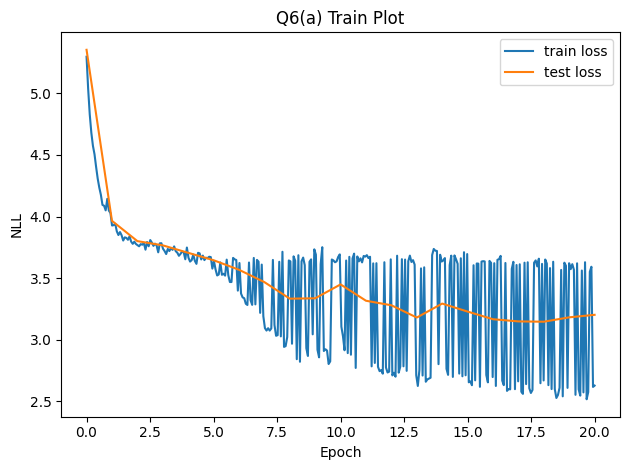

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


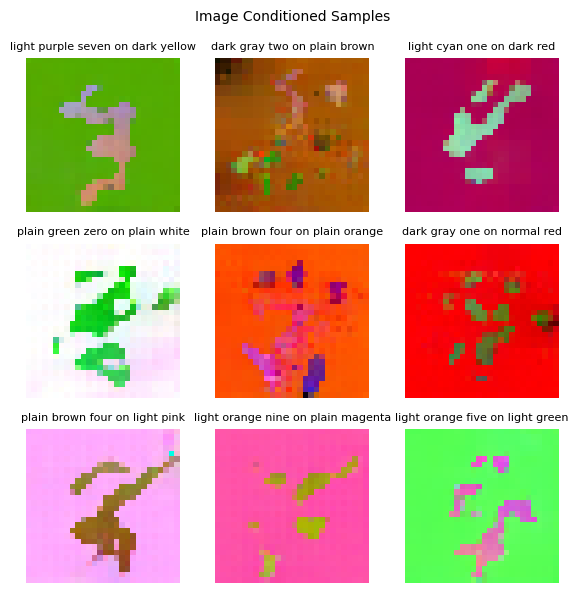

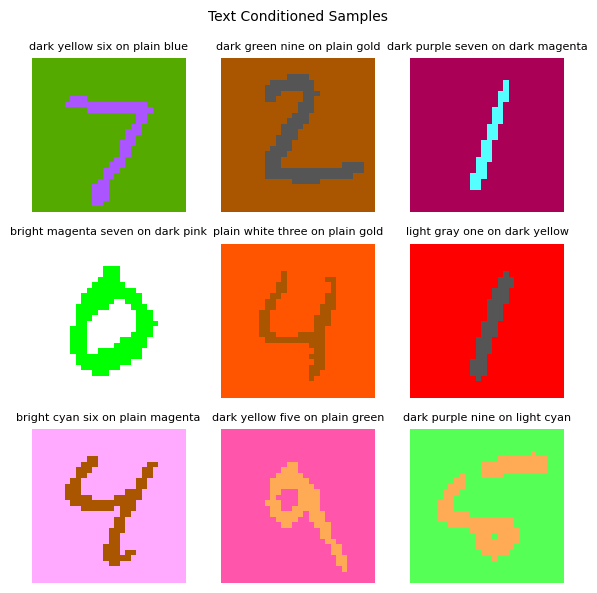

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


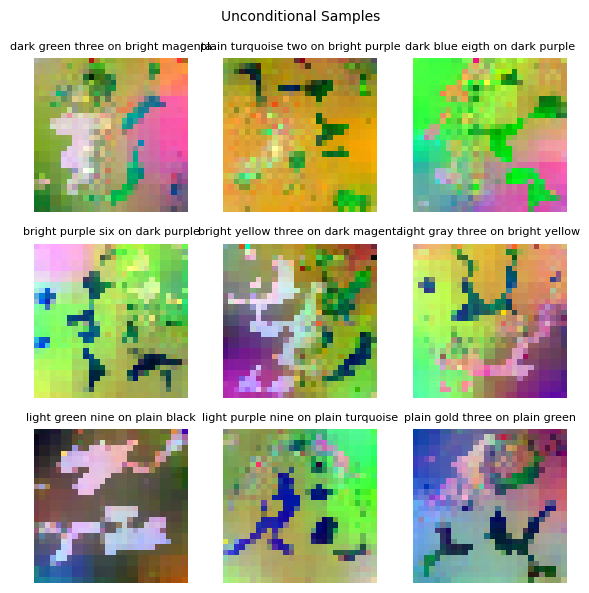

In [47]:
q6a_save_results(q6_a)